In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

In [2]:
crime=pd.read_csv("D:/Tushar-DA&DS/DS-Assignments/Assignment -7-Clustering/crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime.rename(columns={'Unnamed: 0':'City'},inplace=True)
crime.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
len(crime.City.unique())

50

In [5]:
crime.isna().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
crime[crime.duplicated()]

,City,Murder,Assault,UrbanPop,Rape


In [7]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<AxesSubplot:>

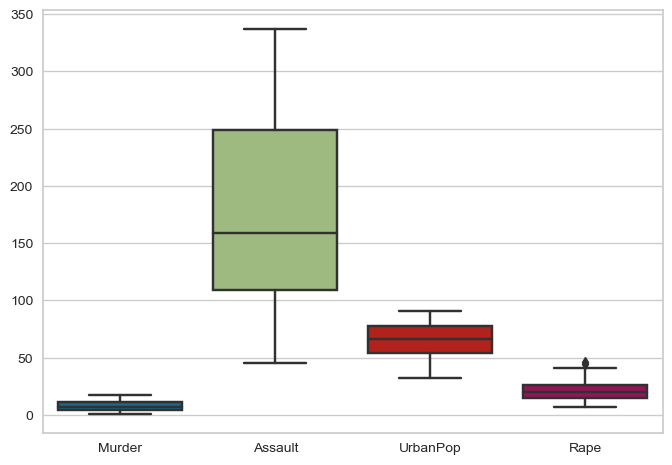

In [9]:
sns.boxplot(data=crime)

<AxesSubplot:xlabel='Rape'>

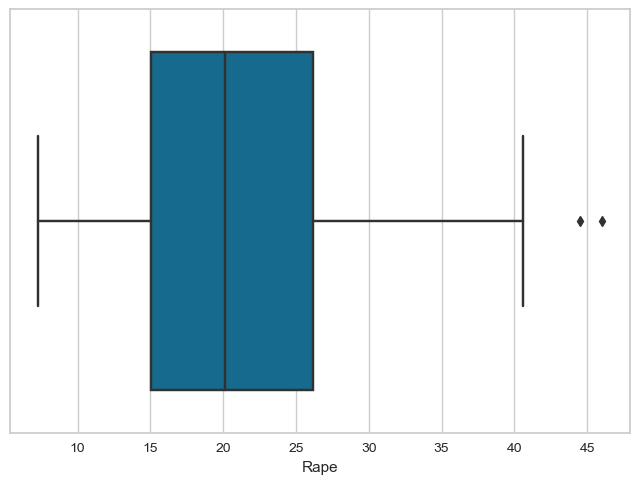

In [10]:
sns.boxplot(crime.Rape)

In [11]:
#detecting outliers

q1,q3=np.percentile(crime['Rape'],[25,75])
print(q1,q3)

15.075 26.175


In [12]:
iqr=q3-q1
print(iqr)

11.100000000000001


In [13]:
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
print(lower_fence,upper_fence)

-1.5750000000000028 42.825


In [14]:
crime[crime.Rape>42.825]

,City,Murder,Assault,UrbanPop,Rape
1,Alaska,10.0,263,48,44.5
27,Nevada,12.2,252,81,46.0


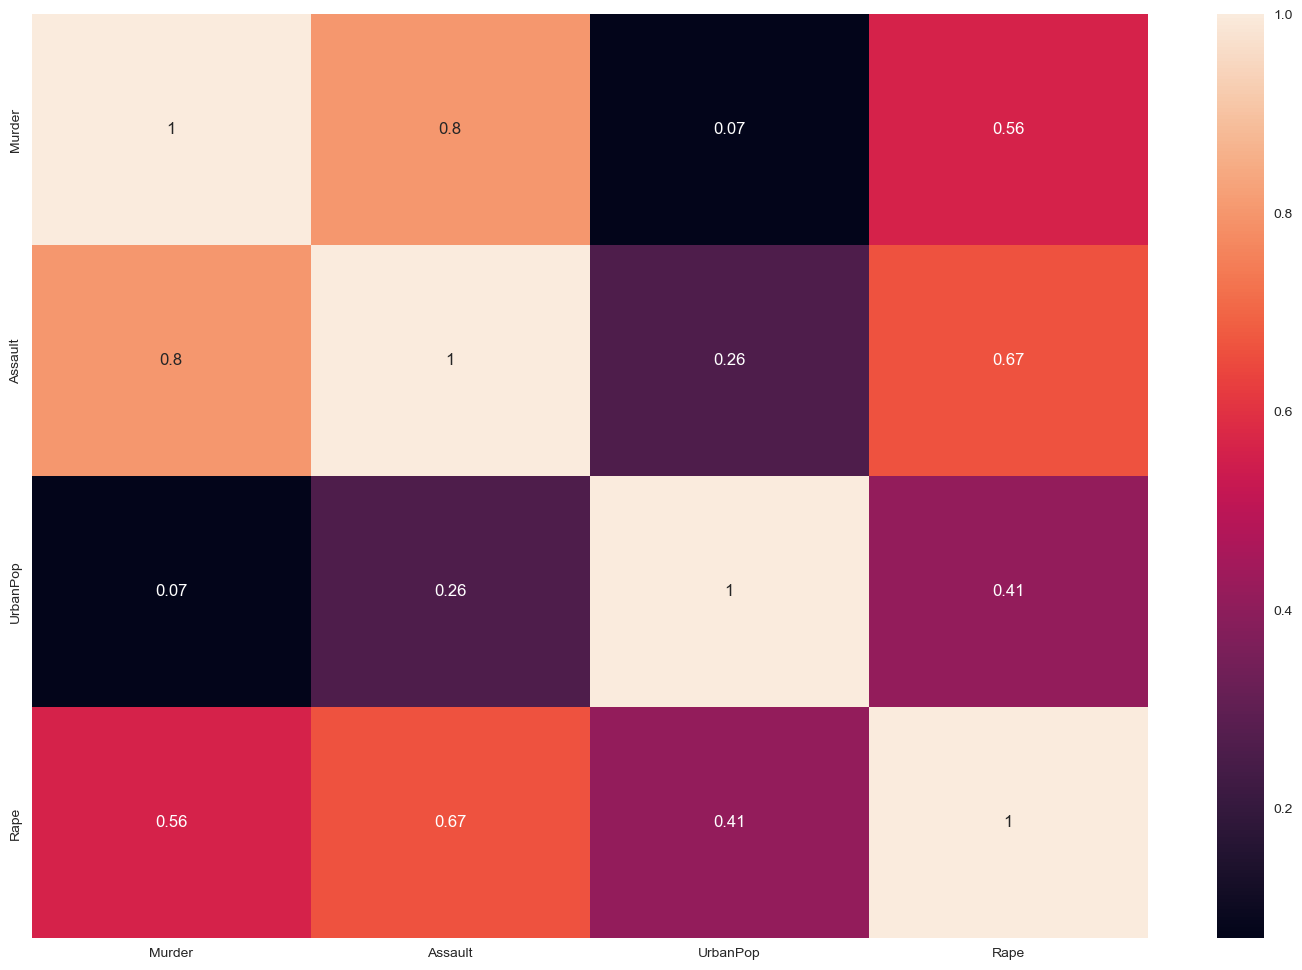

In [15]:
## Checking Correlation

plt.subplots(figsize=(18,12))
sns.heatmap(crime.corr(),annot=True)
plt.show()

# Normalization

In [16]:
crime=crime.drop(['City'],axis=1)
crime.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [17]:
min_max=MinMaxScaler()
crime_norm=min_max.fit_transform(crime)
crime_norm

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

# Standardization

In [18]:
std=StandardScaler()
crime_std=std.fit_transform(crime)
crime_std

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Hierarchical Clustering

In [19]:
n_clusters=[2,3,4,5,6,7,8]
for n_clusters in n_clusters:
    for linkages in ["ward","complete","average","single"]:
        hcluster = AgglomerativeClustering(n_clusters=n_clusters, linkage = linkages)
        hcluster1=hcluster.fit_predict(crime_std)
        silhouette_score1=silhouette_score(crime_std,hcluster1)
        print("For n_clusters =",n_clusters,"The average silhouette score with linkage=",linkages,':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette score with linkage= ward : 0.4047944502519567
For n_clusters = 2 The average silhouette score with linkage= complete : 0.4047944502519567
For n_clusters = 2 The average silhouette score with linkage= average : 0.4084890326217641
For n_clusters = 2 The average silhouette score with linkage= single : 0.23455598753159795

For n_clusters = 3 The average silhouette score with linkage= ward : 0.31036358174027895
For n_clusters = 3 The average silhouette score with linkage= complete : 0.36924314190439733
For n_clusters = 3 The average silhouette score with linkage= average : 0.34863679190476177
For n_clusters = 3 The average silhouette score with linkage= single : 0.14582343625170263

For n_clusters = 4 The average silhouette score with linkage= ward : 0.3370187183556962
For n_clusters = 4 The average silhouette score with linkage= complete : 0.31595507426164543
For n_clusters = 4 The average silhouette score with linkage= average : 0.3636819420151221

For n_clusters = 2 The average silhouette score with linkage= average : 0.4084890326217641. Hence, selecting 2 cluster & average linkage.

In [20]:
# On MinMax Data

n_clusters=[2,3,4,5,6,7,8]
for n_clusters in n_clusters:
    for linkages in ["ward","complete","average","single"]:
        hcluster = AgglomerativeClustering(n_clusters=n_clusters, linkage = linkages)
        hcluster1=hcluster.fit_predict(crime_norm)
        silhouette_score1=silhouette_score(crime_norm,hcluster1)
        print("For n_clusters =",n_clusters,"The average silhouette score with linkage=",linkages,':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette score with linkage= ward : 0.42364457559625074
For n_clusters = 2 The average silhouette score with linkage= complete : 0.42364457559625074
For n_clusters = 2 The average silhouette score with linkage= average : 0.42364457559625074
For n_clusters = 2 The average silhouette score with linkage= single : 0.21033337025958487

For n_clusters = 3 The average silhouette score with linkage= ward : 0.31916915428121284
For n_clusters = 3 The average silhouette score with linkage= complete : 0.30877213909512063
For n_clusters = 3 The average silhouette score with linkage= average : 0.35149572430421583
For n_clusters = 3 The average silhouette score with linkage= single : 0.14223288708185444

For n_clusters = 4 The average silhouette score with linkage= ward : 0.3298707379986785
For n_clusters = 4 The average silhouette score with linkage= complete : 0.3060729442426308
For n_clusters = 4 The average silhouette score with linkage= average : 0.36992391140277

For n_clusters = 2 The average silhouette score with linkage= average : 0.42364457559625074. Hence, Selecting 2 clusters & average linkage.

In [21]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='average')
y_pred_hie = agg_clustering.fit_predict(crime_norm)
y_pred_hie

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [22]:
(silhouette_score(crime_norm, agg_clustering.labels_)*100).round(3)

42.364

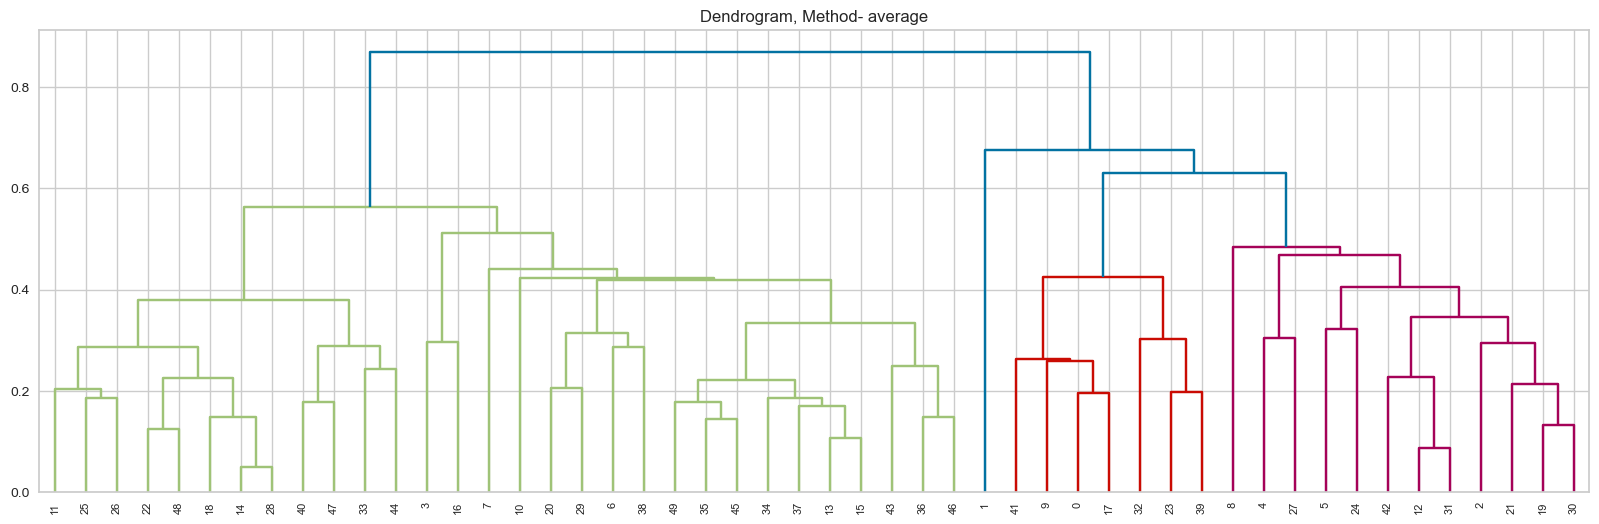

In [23]:
for methods in ['average']: 
    plt.figure(figsize =(20, 6)) 
    plt.title('Dendrogram, Method- {}'.format(methods)) 
    Dendrogram2 = sch.dendrogram(sch.linkage(crime_norm, method = methods,optimal_ordering=False))

### Adding Clusters into original dataset

In [24]:
crime['Hie_Clustering']=agg_clustering.labels_
crime.head()

,Murder,Assault,UrbanPop,Rape,Hie_Clustering
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0


In [25]:
crime['Hie_Clustering'].value_counts()

1    30
0    20
Name: Hie_Clustering, dtype: int64

# K-Means on Standard data

In [26]:
list1= [2,3,4,5,6,7,8,9]

for n_cluster in list1:
    clusterer = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_labels = clusterer.fit_predict(crime_std)
    sil_score= silhouette_score(crime_std, cluster_labels)
    print("For n_clusters =", n_cluster,"The average silhouette_score is :", sil_score)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.3396889143334439
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364116
For n_clusters = 8 The average silhouette_score is : 0.2732934287338534
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804


model1


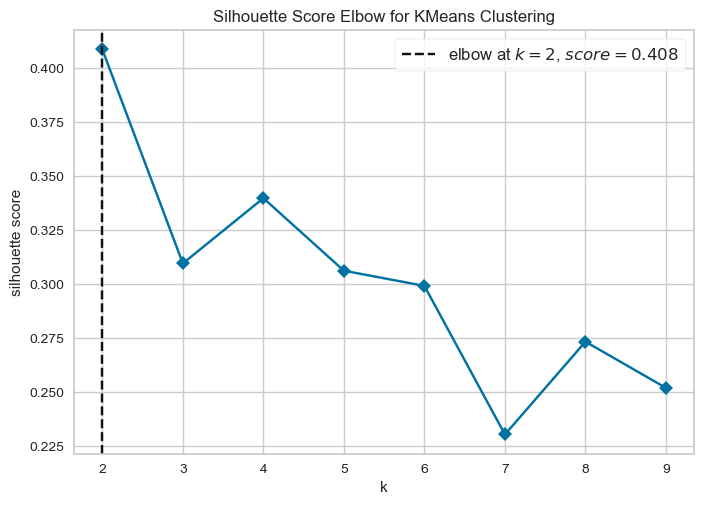

model2


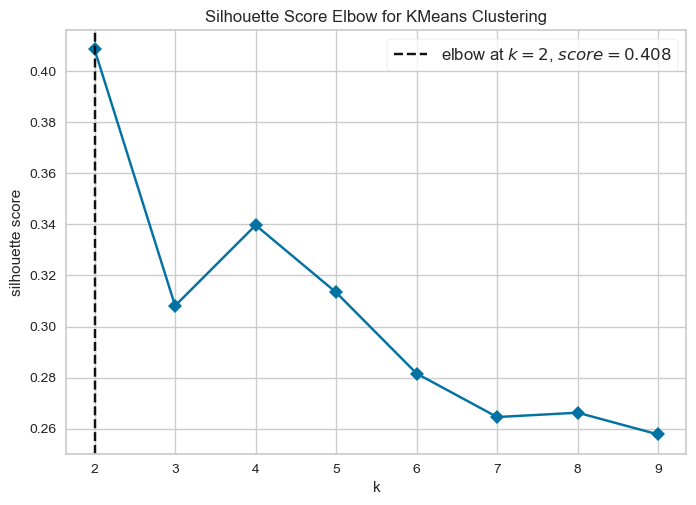

In [27]:
model1 = KMeans(random_state=0)
model2 = KMeans(random_state=10, max_iter=500, n_init=20)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model1, k=n_cluster, metric='silhouette', timings=False)
visualizer2 = KElbowVisualizer(model2, k=n_cluster, metric='silhouette', timings=False)

# Fit the data and visualize
print('model1')
visualizer1.fit(crime_std)
visualizer1.poof()
plt.show()

print('model2')
visualizer2.fit(crime_std)    
visualizer2.poof()
plt.show()

# K Means on MinMax Data

In [28]:
list2= [2,3,4,5,6,7,8,9]

for n_cluster in list2:
    clusterer = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_labels = clusterer.fit_predict(crime_norm)
    sil_score= silhouette_score(crime_norm, cluster_labels)
    print("For n_clusters =", n_cluster,"The average silhouette_score is :", sil_score)

For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.3187755079997931
For n_clusters = 4 The average silhouette_score is : 0.3408903560074363
For n_clusters = 5 The average silhouette_score is : 0.3062742525752849
For n_clusters = 6 The average silhouette_score is : 0.2703558739205172
For n_clusters = 7 The average silhouette_score is : 0.2371119747926814
For n_clusters = 8 The average silhouette_score is : 0.24422345369104234
For n_clusters = 9 The average silhouette_score is : 0.23181794623773658


model3


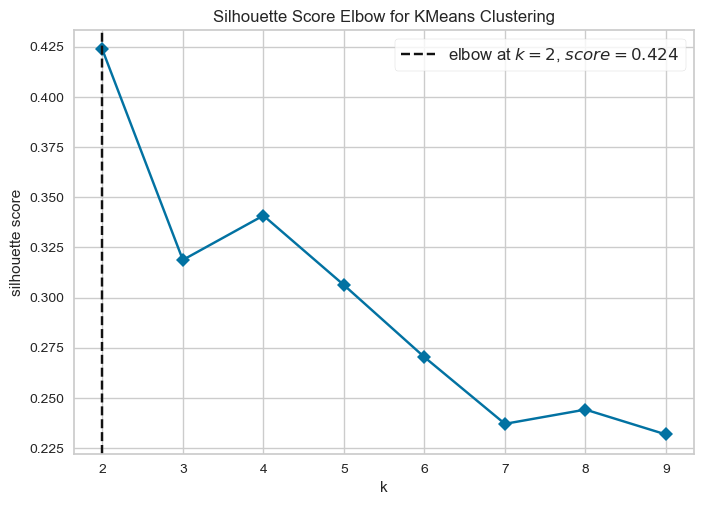

model4


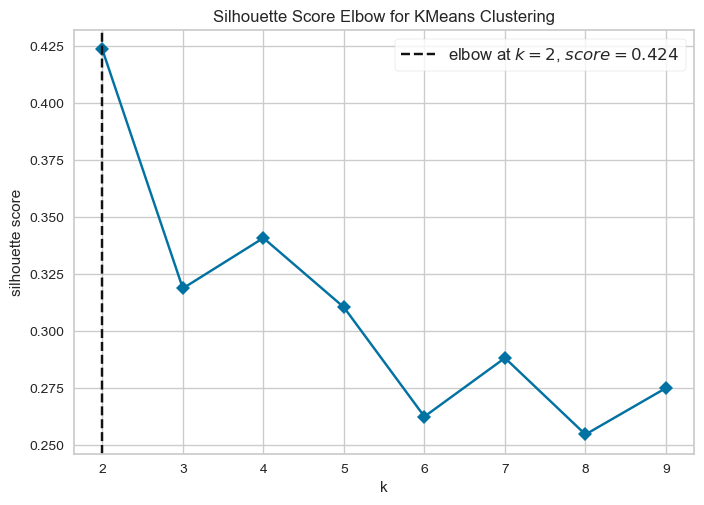

In [29]:
model3 = KMeans(random_state=0)
model4 = KMeans(random_state=10, max_iter=500, n_init=20)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer3 = KElbowVisualizer(model3, k=n_cluster, metric='silhouette', timings=False)
visualizer4 = KElbowVisualizer(model4, k=n_cluster, metric='silhouette', timings=False)

# Fit the data and visualize
print('model3')
visualizer3.fit(crime_norm)
visualizer3.poof()
plt.show()

print('model4')
visualizer4.fit(crime_norm)  
visualizer4.poof()
plt.show()

<AxesSubplot:ylabel='count'>

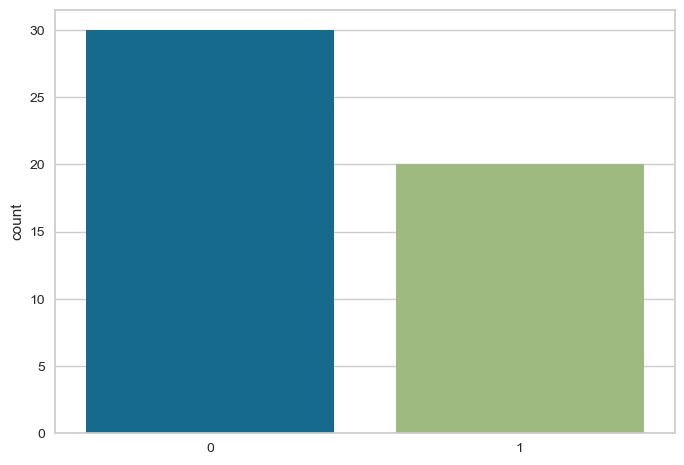

In [30]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(crime_norm)
sns.countplot(y_predict_kmeans)

In [31]:
model_kmeans.cluster_centers_

array([[0.24518072, 0.23778539, 0.53615819, 0.22334195],
       [0.68463855, 0.72003425, 0.61694915, 0.56498708]])

In [32]:
model_kmeans.inertia_

6.596893867946196

In [33]:
model_kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

# Visualizing

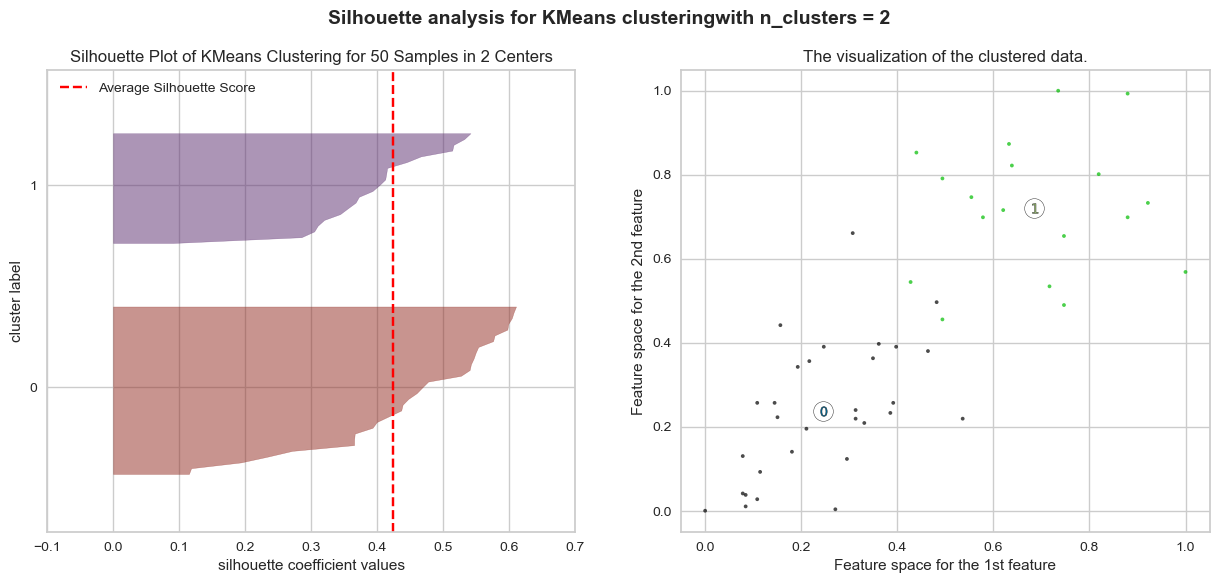

In [34]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(crime_norm)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 2 is number of clusters
ax2.scatter(crime_norm[:, 0], crime_norm[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering"
                  "with n_clusters = %d" % 2),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

# KMeans clustering adding to original dataset

In [35]:
crime['KMeans_Clustering']=model_kmeans.labels_
crime

,Murder,Assault,UrbanPop,Rape,Hie_Clustering,KMeans_Clustering
0,13.2,236,58,21.2,0,1
1,10.0,263,48,44.5,0,1
2,8.1,294,80,31.0,0,1
3,8.8,190,50,19.5,1,0
4,9.0,276,91,40.6,0,1
5,7.9,204,78,38.7,0,1
6,3.3,110,77,11.1,1,0
7,5.9,238,72,15.8,1,0
8,15.4,335,80,31.9,0,1
9,17.4,211,60,25.8,0,1


# DBSCAN using Std data

In [36]:
from sklearn.cluster import DBSCAN
from itertools import product

In [37]:
eps_values = np.arange(0.25,3,0.25)
min_samples = np.arange(3,23)
DBSCAN_params = list(product(eps_values, min_samples))
DBSCAN_params

[(0.25, 3),
 (0.25, 4),
 (0.25, 5),
 (0.25, 6),
 (0.25, 7),
 (0.25, 8),
 (0.25, 9),
 (0.25, 10),
 (0.25, 11),
 (0.25, 12),
 (0.25, 13),
 (0.25, 14),
 (0.25, 15),
 (0.25, 16),
 (0.25, 17),
 (0.25, 18),
 (0.25, 19),
 (0.25, 20),
 (0.25, 21),
 (0.25, 22),
 (0.5, 3),
 (0.5, 4),
 (0.5, 5),
 (0.5, 6),
 (0.5, 7),
 (0.5, 8),
 (0.5, 9),
 (0.5, 10),
 (0.5, 11),
 (0.5, 12),
 (0.5, 13),
 (0.5, 14),
 (0.5, 15),
 (0.5, 16),
 (0.5, 17),
 (0.5, 18),
 (0.5, 19),
 (0.5, 20),
 (0.5, 21),
 (0.5, 22),
 (0.75, 3),
 (0.75, 4),
 (0.75, 5),
 (0.75, 6),
 (0.75, 7),
 (0.75, 8),
 (0.75, 9),
 (0.75, 10),
 (0.75, 11),
 (0.75, 12),
 (0.75, 13),
 (0.75, 14),
 (0.75, 15),
 (0.75, 16),
 (0.75, 17),
 (0.75, 18),
 (0.75, 19),
 (0.75, 20),
 (0.75, 21),
 (0.75, 22),
 (1.0, 3),
 (1.0, 4),
 (1.0, 5),
 (1.0, 6),
 (1.0, 7),
 (1.0, 8),
 (1.0, 9),
 (1.0, 10),
 (1.0, 11),
 (1.0, 12),
 (1.0, 13),
 (1.0, 14),
 (1.0, 15),
 (1.0, 16),
 (1.0, 17),
 (1.0, 18),
 (1.0, 19),
 (1.0, 20),
 (1.0, 21),
 (1.0, 22),
 (1.25, 3),
 (1.25, 4),
 (1.

In [43]:
from sklearn.neighbors import NearestNeighbors

In [52]:
neighb = NearestNeighbors(n_neighbors=4)
nbrs=neighb.fit(crime_std)
distances,indices=nbrs.kneighbors(crime_std) 

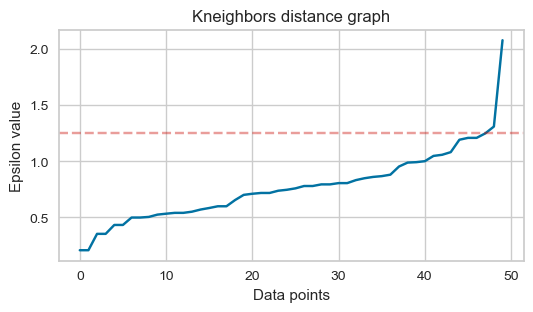

In [58]:
plt.figure(figsize=(6,3))
plt.plot(distances)
plt.axhline(y=1.25, color='r', linestyle='--', alpha=0.4) # elbow line
plt.title('Kneighbors distance graph')
plt.xlabel('Data points')
plt.ylabel('Epsilon value')
plt.show();

In [ ]:
eps_values = np.arange(0.5,1.5,0.25)
min_samples = np.arange(3,23)

In [61]:
output = []

for p in eps_values:
    for m in min_samples:
        dbs = DBSCAN(min_samples=m, eps = p)
        DBS_clustering=dbs.fit(crime_std)
        score = silhouette_score(crime_std, DBS_clustering.labels_)
        output.append((m, p, score))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)